# **Reinforcement Learning Project - BlackJack**


 In this project, we will try to identify the most effective game strategy for Blackjack through reinforcement learning. You will have the opportunity to investigate the fundamentals of Reinforcement Learning and explore various approaches.

----


## __Table of Contents__
<ol>
    <li><a href="#objectives">Objectives</a></li>
    <li><a href="#imports">Import Libraries and Setup</a></li>
    <li><a href="#Blackjack-Environment">Blackjack Environment</a></li>
    <li><a href="#Models">Models</a>
        <ol>
            <li><a href="#Random">Random</a></li>
            <li><a href="#Monte-Carlo-on-Policy-with-First-Visit-Exploring-Starts">Monte Carlo On-Policy First Visit & Exploring Starts</a>
                <ol>
                    <li><a href="#Agressive">Agressive</a></li>
                    <li><a href="#Conservative">Conservative</a></li>
                    <li><a href="#Neutral">Neutral</a></li>
                </ol>
            </li>
            <li><a href="#Monte-Carlo-on-Policy-with-Every-Visit-Exploring-Starts">Monte Carlo On-Policy Every Visit & Exploring Starts</a>
                <ol>
                    <li><a href="#Agressive">Agressive</a></li>
                    <li><a href="#Conservative">Conservative</a></li>
                    <li><a href="#Neutral">Neutral</a></li>
                </ol>
            </li>
            <li><a href="#Monte-Carlo-off-Policy">Monte Carlo Off-Policy</a>
                <ol>
                    <li><a href="#Agressive">Agressive</a></li>
                    <li><a href="#Conservative">Conservative</a></li>
                    <li><a href="#Neutral">Neutral</a></li>
                </ol>
            </li>
            <li><a href="#QLearning">QLearning</a>
                <ol>
                    <li><a href="#Agressive">Agressive</a></li>
                    <li><a href="#Conservative">Conservative</a></li>
                    <li><a href="#Neutral">Neutral</a></li>
                </ol>
            </li>
            <li><a href="#Sarsa-Temporal-Difference-control">Sarsa (Temporal Difference control)</a>
                <ol>
                    <li><a href="#Agressive">Agressive</a></li>
                    <li><a href="#Conservative">Conservative</a></li>
                    <li><a href="#Neutral">Neutral</a></li>
                </ol>
            </li>
             <li><a href="#DeepQLearning">DeepQLearning</a></li>
        </ol>
    </li>
    <li><a href="#Results">Results Comparison and Conclusions</a>
</ol>

# **1. Objectives**

The primary objectives of this project encompass a comprehensive exploration of reinforcement learning within the context of the Blackjack environment. The key milestones include:

1. OpenAI Gym Environment Selection:
- Careful selection and integration of the OpenAI Gym environment tailored for the Blackjack card game.

2. Reinforcement Learning Concept Explanation:
- Clear and concise explanation of fundamental reinforcement learning concepts, ensuring a solid foundation for understanding the subsequent experimentation.

3. Blackjack Environment Training and Testing:

- Training intelligent agents within the Blackjack environment using various reinforcement learning techniques;
- Rigorous testing of trained agents to evaluate their performance and adaptability.

4. **Environment Setup**:
- Establishment of a robust environment setup for experimentation, encompassing agent-environment interactions, state-action spaces, and reward structures.

5. **Learning Techniques**:
- Implementation and exploration of diverse reinforcement learning algorithms, including Monte Carlo, Sarsa, and Q-Learning;
- Analysis of on-policy and off-policy methods, such as On Policy First Visit and Exploring Starts.

6. **Experiment Logging**:
- Systematic logging and documentation of experimental results, ensuring transparency and reproducibility.

7. **Comparisons and Analyses**:
- Comparative analyses of different reinforcement learning models to identify strengths, weaknesses, and insights.
- Evaluation of performance metrics and strategies employed by each agent type.

These objectives collectively aim to provide a comprehensive understanding of reinforcement learning principles while showcasing their application in the dynamic and strategic domain of the Blackjack card game.

## 2. **Import Libraries**

It is advisable to consolidate the importation of all necessary libraries in a single location (as shown here):

In [5]:
# !pip install gym==0.22.0 pygame
import gym
import matplotlib.pyplot as plt
import torch
from tabulate import tabulate
from collections import namedtuple, deque
import numpy as np
import pandas as pd
import itertools
import time

import sys
sys.path.append('..') 

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from src.features.blackjackutility import average_results_with_plot, games_with_policy, reward_function, play_n_games
from src.visualization.visualize import plot_value_function, plot_policy_blackjack, training_results, create_grids, create_grids_monte_carlo, create_plots
from src.models.MonteCarlo import monte_carlo_on_policy, monte_carlo_off_policy
from src.models.QLearning import QLearningAgent
from src.models.Sarsa import SarsaAgent
from src.models.DeepQLearning import DeepQLearningAgent, ReplayMemory, set_device, train_deepqlearning

# 3. **Understanding Reinforcement Learning**
In essence, **Reinforcement Learning (RL)** is a machine learning paradigm centered around rewarding desired actions and penalizing undesired ones. RL models, akin to human decision-makers, select actions based on the anticipated return for each action. The process involves providing the model with input containing information about the current situation and potential actions, followed by rewarding or punishing based on the output. RL models grasp task performance through repeated trial and error interactions within a dynamic environment, devoid of human intervention.

**Key Terminology**
- **Agent**: The RL model acting as a decision-maker and learner;
- **Environment**: The surrounding world in which the agent operates, learning and making decisions. The environment processes the agent's actions, returning the next state and a reward;
- **State**: A comprehensive description of the environment's current state;
- **Action**: The agent's interaction with the environment, encompassing the moves it can make. The set of all possible actions is known as the Action Space;
- **Reward**: Feedback from the environment, either negative or positive, influencing the agent's behavior. Rewards serve as indicators of the desired outcomes, and agents learn to estimate them accurately;
- **Policy**: A rule guiding the agent's decision-making, mapping from a specific state to an action or a set of probabilities for actions in the action space;
- **Value Function**: A function returning the expected total reward an agent can obtain by following a specific policy. In this lab, we focus on the state-action value function, denoted as $Q(s,a)$, estimating the reward for taking action $a$ from state $s$.

**The RL Process**
1. The agent engages in multiple gameplays;
2. In each game, the agent selects an **Action** from the action space using the **Policy** and **Value Function**;
3. The chosen **Action** influences the environment, yielding a **Reward** and a new **State**;
4. The agent records the received reward for each action from a specific set;
5. After completing a game, the agent updates the estimated rewards for each state-action pair based on the actual rewards obtained;
6. The entire process iterates.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0O9IEN/reinforcement-learning-fig1-700.jpg" width="30%" alt="cheques image">

Prominent RL models excelling in games like Chess, Go, or Atari are built upon these foundational principles. While these concepts may initially appear complex, we'll delve deeper into them throughout the lab, making them more accessible.

Now that the basics are clear, let's apply these concepts to the Blackjack environment.

## 4. **Blackjack Environment**

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/blackjack.gif" width="30%" alt="iris image">

**Blackjack** is a card game where players compete against a dealer. At the onset of each round, both the player and the dealer receive two cards, with the player having visibility of only one of the dealer's cards. The objective of the game is to achieve a card value as close to 21 as possible without surpassing it. Each card holds a specific value:

- 10/Jack/Queen/King → 10
- 2 through 9 → Face value of the card
- Ace → 1 or 11 (Player's choice), with the ace serving as especially advantageous when it can be counted as 11 without causing the total to exceed 21.

Players, if their total is below 21, can opt to "hit" and draw a random card from the deck or "stand" to retain their existing cards. Going beyond 21 results in a "bust," leading to an automatic loss. A hand totaling exactly 21 results in an automatic win. In cases where neither player nor dealer reaches 21, victory goes to the participant closest to this value without exceeding it.

We create an openAI gym blackjack enviroment by calling gym method through the use of Make function.


In [6]:
environment = gym.make("Blackjack-v1", sab = True)

Now, it's time to explore the **observation space** in our environment. The observation space represents the set of all conceivable states, and we can access this space using the **observation_space** method

In [4]:
print(environment.observation_space)
print(environment.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


This can be described as:

States -> Tuple(Discrete(32), Discrete(11), Discrete(2)) where:
* The player's card sum can range from the lowest (1) to the highest (11, 10, 11), resulting in 32 possible states.
* The dealer's face-up card can take values between 1 and 11.
* The 'usable Ace' space can be either True or False, equating to 2 possible states.

    Hence, there are a total of 704 possible states, computed as: $32 \times 11 \times 2 = 704$. 

Actions -> [0,1]
* Either stand or hit: [0,1] i.e 0 for stand , 1 for hit


In [4]:
state = environment.reset()
print("s_{} = {}".format(0, environment.observation_space.sample())) 

s_0 = (23, 10, 0)


Let's see more possible states:


In [5]:
# Generate samples of the observation space
samples = [("s_{}".format(i), environment.observation_space.sample()) for i in range(15)]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(samples, headers=["Sample", "Observation"], tablefmt="fancy_grid"))

╒══════════╤═══════════════╕
│ Sample   │ Observation   │
╞══════════╪═══════════════╡
│ s_0      │ (30, 0, 0)    │
├──────────┼───────────────┤
│ s_1      │ (4, 0, 0)     │
├──────────┼───────────────┤
│ s_2      │ (24, 3, 0)    │
├──────────┼───────────────┤
│ s_3      │ (6, 3, 1)     │
├──────────┼───────────────┤
│ s_4      │ (22, 9, 1)    │
├──────────┼───────────────┤
│ s_5      │ (24, 6, 1)    │
├──────────┼───────────────┤
│ s_6      │ (31, 1, 1)    │
├──────────┼───────────────┤
│ s_7      │ (14, 7, 0)    │
├──────────┼───────────────┤
│ s_8      │ (29, 3, 0)    │
├──────────┼───────────────┤
│ s_9      │ (10, 5, 0)    │
├──────────┼───────────────┤
│ s_10     │ (11, 10, 0)   │
├──────────┼───────────────┤
│ s_11     │ (12, 2, 0)    │
├──────────┼───────────────┤
│ s_12     │ (6, 8, 0)     │
├──────────┼───────────────┤
│ s_13     │ (14, 3, 1)    │
├──────────┼───────────────┤
│ s_14     │ (18, 1, 0)    │
╘══════════╧═══════════════╛


In [6]:
# Generating actions and storing them in a list for tabulate
actions = []
for t in range(10):
    action = environment.action_space.sample()
    action_text = "Hit, A_{}".format(t) if action else "Stay"
    actions.append([action_text, action])

# Print the actions in a tabular format with "fancy grid" style
print(tabulate(actions, headers=["Action", "Value"], tablefmt="fancy_grid"))

╒══════════╤═════════╕
│ Action   │   Value │
╞══════════╪═════════╡
│ Hit, A_0 │       1 │
├──────────┼─────────┤
│ Hit, A_1 │       1 │
├──────────┼─────────┤
│ Stay     │       0 │
├──────────┼─────────┤
│ Hit, A_3 │       1 │
├──────────┼─────────┤
│ Hit, A_4 │       1 │
├──────────┼─────────┤
│ Hit, A_5 │       1 │
├──────────┼─────────┤
│ Stay     │       0 │
├──────────┼─────────┤
│ Hit, A_7 │       1 │
├──────────┼─────────┤
│ Stay     │       0 │
├──────────┼─────────┤
│ Stay     │       0 │
╘══════════╧═════════╛


Let's also check the player and dealers cards by using `environment.player` and `environment.dealer` function 


In [7]:
print(environment.observation_space.sample())
print(environment.player)
print(environment.dealer)

(19, 8, 0)
[10, 1]
[6, 10]


Let's delve into additional terminology. An **episode** encompasses a series of agent-environment interactions, spanning from the initial to the final state, essentially representing a single game played by the agent. Furthermore, our agents function within a discrete-time game, where each decision advancing the game clock is termed a step (e.g., taking an action from a specific state). It's evident that each episode is composed of a sequence of individual steps.

Now, let's engage in playing through several episodes of the game, where random actions are selected for each step:


In [8]:
episodes = 2

for agent_type in ["Conservador", "Neutro", "Agressivo"]:


    for episode in range(episodes):
        total_reward = 0
        state = environment.reset()
        done = False
        print("_________________________________________")
        print("Episode {} - Agent Type: {}".format(episode, agent_type))
        print("")
        print("Initial Agent's Cards: {}".format(environment.player))
        print("Dealer's Showing Card: {}".format(environment.dealer[0]))

        while not done:
            action = environment.action_space.sample()

            print("The Agent's current sum: {}, Agent's usable ace: {}".format(state[0], state[2]))
            print("")
            if action:
                print("Action: Hit")
            else:
                print("Action: Stand")

            custom_reward = reward_function(state, action, agent_type=agent_type, player_sum=state[0])
            print("Custom Reward for Agent Type {}: {}".format(agent_type, custom_reward))

            state, default_reward, done, info = environment.step(action)

            print("The Agent has the following cards: {}".format(environment.player))

            total_reward += custom_reward  # Add custom_reward to each move

        # Displays the dealer's final cards after each episode
        print("Dealer's Final Cards: {}".format(environment.dealer))
        print("")
        print("Default Reward: {}".format(default_reward))
        print("Total Custom Reward: {}".format(total_reward))  # Custom Reward para a última jogada
        print("Total Reward for Agent Type {}: {}".format(agent_type, total_reward + default_reward))  # Fix: Add custom_reward + default_reward


_________________________________________
Episode 0 - Agent Type: Conservador

Initial Agent's Cards: [6, 10]
Dealer's Showing Card: 3
The Agent's current sum: 16, Agent's usable ace: False

Action: Stand
Custom Reward for Agent Type Conservador: 0.1
The Agent has the following cards: [6, 10]
Dealer's Final Cards: [3, 7, 7]

Default Reward: -1.0
Total Custom Reward: 0.1
Total Reward for Agent Type Conservador: -0.9
_________________________________________
Episode 1 - Agent Type: Conservador

Initial Agent's Cards: [10, 2]
Dealer's Showing Card: 7
The Agent's current sum: 12, Agent's usable ace: False

Action: Stand
Custom Reward for Agent Type Conservador: 0.1
The Agent has the following cards: [10, 2]
Dealer's Final Cards: [7, 5, 10]

Default Reward: 1.0
Total Custom Reward: 0.1
Total Reward for Agent Type Conservador: 1.1
_________________________________________
Episode 0 - Agent Type: Neutro

Initial Agent's Cards: [8, 3]
Dealer's Showing Card: 6
The Agent's current sum: 11, Agent

Run the code above for 10 episodes and observe that our games are not consistently fortunate. Try engaging in the game manually – perhaps you can surpass the random action generator:

The number of episodes will increment from 2 to 10.

In [9]:
episodes = 10

for agent_type in ["Conservador", "Neutro", "Agressivo"]:


    for episode in range(episodes):
        total_reward = 0
        state = environment.reset()
        done = False
        print("_________________________________________")
        print("Episode {} - Agent Type: {}".format(episode, agent_type))
        print("")
        print("Initial Agent's Cards: {}".format(environment.player))
        print("Dealer's Showing Card: {}".format(environment.dealer[0]))

        while not done:
            action = environment.action_space.sample()
            print(state)
            print("The Agent's current sum: {}, Agent's usable ace: {}".format(state[0], state[2]))
            print("")
            if action:
                print("Action: Hit")
            else:
                print("Action: Stand")

            custom_reward = reward_function(state, action, agent_type=agent_type, player_sum=state[0])
            print("Custom Reward for Agent Type {}: {}".format(agent_type, custom_reward))

            state, default_reward, done, info = environment.step(action)

            print("The Agent has the following cards: {}".format(environment.player))

            total_reward += custom_reward  # Add custom_reward to each move

        # Displays the dealer's final cards after each episode
        print("Dealer's Final Cards: {}".format(environment.dealer))
        print("")
        print("Default Reward: {}".format(default_reward))
        print("Total Custom Reward: {}".format(total_reward))  # Custom Reward para a última jogada
        print("Total Reward for Agent Type {}: {}".format(agent_type, total_reward + default_reward))  #Add custom_reward + default_reward


_________________________________________
Episode 0 - Agent Type: Conservador

Initial Agent's Cards: [3, 10]
Dealer's Showing Card: 7
(13, 7, False)
The Agent's current sum: 13, Agent's usable ace: False

Action: Stand
Custom Reward for Agent Type Conservador: 0.1
The Agent has the following cards: [3, 10]
Dealer's Final Cards: [7, 4, 10]

Default Reward: -1.0
Total Custom Reward: 0.1
Total Reward for Agent Type Conservador: -0.9
_________________________________________
Episode 1 - Agent Type: Conservador

Initial Agent's Cards: [1, 10]
Dealer's Showing Card: 10
(21, 10, True)
The Agent's current sum: 21, Agent's usable ace: True

Action: Hit
Custom Reward for Agent Type Conservador: -0.2
The Agent has the following cards: [1, 10, 5]
(16, 10, False)
The Agent's current sum: 16, Agent's usable ace: False

Action: Stand
Custom Reward for Agent Type Conservador: 0.1
The Agent has the following cards: [1, 10, 5]
Dealer's Final Cards: [10, 9]

Default Reward: -1.0
Total Custom Reward: -0.

At first we will start by exploring what greedy policy is and does:


### **Epsilon-Greedy Policy**

As previously discussed, a policy is a function guiding the agent on which action to take given the current state. In our environment, a straightforward deterministic policy $\pi$ for the state $(15,10,0)$ could appear as follows:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/Screenshot%202022-11-23%20at%2010.36.45%20AM.png" width="50%" alt="iris image">


You might wonder why we wouldn't consistently opt for the best action, the one with the highest estimated reward, and what purpose the epsilon constant serves. To address this, we need to delve into two additional concepts:

- **Exploration**: This occurs when the agent takes a random action to explore more opportunities, collecting additional information about potential actions and the environment.

- **Exploitation**: This happens when the agent makes the best decision based on current information, utilizing the action with the best estimated reward to maximize overall rewards.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/Screenshot%202022-11-23%20at%2010.51.11%20AM.png" width="50%" alt="iris image">

As illustrated in the diagram, **Epsilon** determines the balance between Exploration and Exploitation. This parameter is essential because the best long-term strategy might involve short-term sacrifices. In most scenarios, agents must explore the environment and accumulate sufficient information to make optimal decisions overall. Epsilon prevents our agent from consistently choosing actions that appear effective immediately rather than discovering the best long-term strategies.

## 4. **Models**

This code initializes an empty DataFrame named results_df with columns for different model metrics. It then adds values representing the human model's average wins, average losses, and average draws to the DataFrame

In [4]:
# Create an empty DataFrame with the desired columns
results_df = pd.DataFrame(columns=['Model', 'Average Wins', 'Average Losses', 'Average Draws'])

# Adding Values for the Human Model
results_df.loc[len(results_df)] = ["Human", 0.4222, 0.0848, 0.4910]

## 4.1 Random

This code snippet defines a function **random_action** to obtain a random action from the action space. It then utilizes this function to create a random policy **(random_policy)**. The average performance of the random agent is calculated over 200,000 episodes using the **average_results_with_plot** function, and the results are printed in a tabular format. Finally, the results are added to the results_df DataFrame for the final comparison dataset.

In [9]:
# Function to get a random action from the action space
def random_action(action_space):
    return action_space.sample()

# Get a random policy
random_policy = random_action(environment.action_space)

# Calculate the average number of wins, losses, and draws over 200,000 episodes and plot the results
average_wins, average_losses, average_draws = average_results_with_plot(environment, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

# Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Random Agent", average_wins, average_losses, average_draws]


╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.283225 │
├────────────────┼──────────┤
│ Average Losses │ 0.675725 │
├────────────────┼──────────┤
│ Average Draws  │ 0.04105  │
╘════════════════╧══════════╛


## 4.2 Monte Carlo Method

### 4.2.1 Monte Carlo On-Policy First Visit & Eploring Starts


In [5]:
# Define the hyperparameter values to test
n_episode_values = [200000]
discount_factor_values = [0.9] #, 0.70.95, 0.99, 1.0]
first_visit_values = [True]
epsilon_values = [0.05] #, 0.1, 0.2, 0.5, 0.9]
theta_values = [0]#, 0.001, 0.05, 0.1, 0.5, 1.0]

# Lists to store the results
tuning_results = []

# Perform grid search
for n_episode, discount_factor, first_visit, epsilon, theta in itertools.product(n_episode_values, discount_factor_values, first_visit_values, epsilon_values, theta_values):
    print(f"n_episode: {n_episode}, discount_factor: {discount_factor}, first_visit: {first_visit}, epsilon: {epsilon}, theta: {theta}")
    
    start_time = time.time()  # Record the start time

    policy, V, Q, DELTA = monte_carlo_on_policy(environment=environment, 
                                         N_episodes=n_episode, 
                                         discount_factor=discount_factor, 
                                         first_visit=first_visit, 
                                         epsilon=epsilon,
                                         theta=theta)
    
    elapsed_time = time.time() - start_time  # Calculate elapsed time


    average_wins, average_losses, average_draws = average_results_with_plot(environment=environment, policy=policy, episodes=5000000, plot=False)
    
    print(f"Average: {average_wins}\n")
    print(f"Elapsed Time: {elapsed_time} seconds\n")  # Print the elapsed time
    
    tuning_results.append({
        "n_episode": n_episode,
        "discount_factor": discount_factor,
        "first_visit": first_visit,
        "epsilon": epsilon,
        "theta": theta,
        "average": average_wins,
        "elapsed_time": elapsed_time
    })

# Find the best combination of hyperparameters
best_result = max(tuning_results, key=lambda x: x["average"])
print("Best Hyperparameters:")
print("n_episode:", best_result["n_episode"])
print("discount_factor:", best_result["discount_factor"])
print("first_visit:", best_result["first_visit"])
print("epsilon:", best_result["epsilon"])
print("theta:", best_result["theta"])
print("Average:", best_result["average"])
print("Elapsed Time:", best_result["elapsed_time"], "seconds")


n_episode: 200000, discount_factor: 0.7, first_visit: True, epsilon: 0.05, theta: 0
Average: 0.4321636

Elapsed Time: 27.996729373931885 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: True, epsilon: 0.1, theta: 0
Average: 0.4309694

Elapsed Time: 63.438082695007324 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: True, epsilon: 0.2, theta: 0
Average: 0.4316552

Elapsed Time: 62.071646213531494 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: True, epsilon: 0.5, theta: 0
Average: 0.4330962

Elapsed Time: 46.86639451980591 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: True, epsilon: 0.9, theta: 0
Average: 0.4331526

Elapsed Time: 1015.8376576900482 seconds

n_episode: 200000, discount_factor: 0.9, first_visit: True, epsilon: 0.05, theta: 0
Average: 0.4335744

Elapsed Time: 75.1379005908966 seconds

n_episode: 200000, discount_factor: 0.9, first_visit: True, epsilon: 0.1, theta: 0
Average: 0.4334008

Elapsed Time: 36.31886339187

#### 4.2.1.1 Monte Carlo On-Policy First Visit & Exploring Starts - Agressive


In [10]:
policy, V, Q, DELTA = monte_carlo_on_policy(environment, N_episodes = 200000, discount_factor = 0.9, epsilon = 0.05, first_visit = True, theta=0)  

In [11]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment, policy, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo On-Policy First Visit & Exploring Starts - Agressive", average_wins, average_losses, average_draws]

╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.43209  │
├────────────────┼──────────┤
│ Average Losses │ 0.484105 │
├────────────────┼──────────┤
│ Average Draws  │ 0.083805 │
╘════════════════╧══════════╛


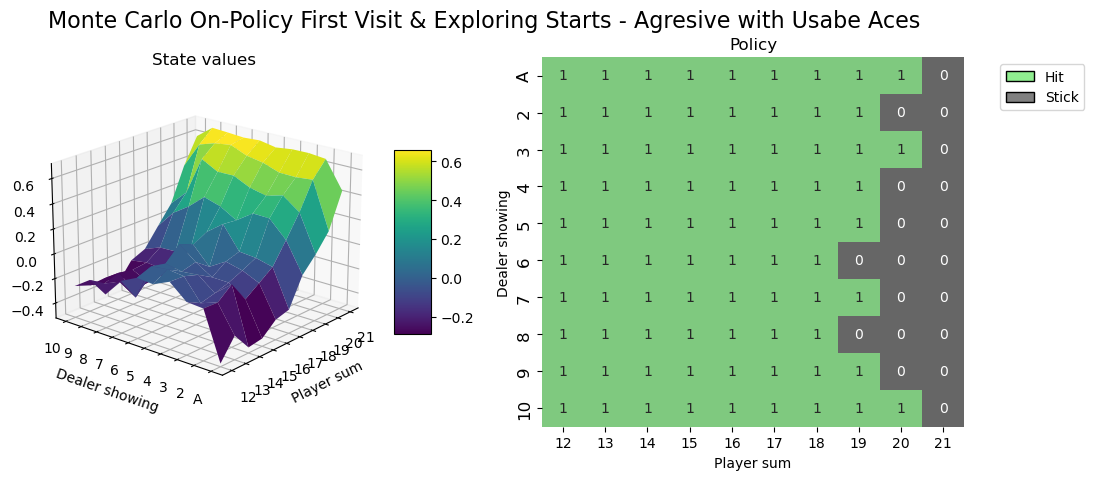

In [7]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy First Visit & Exploring Starts - Agressive with Usabe Aces")
plt.show()

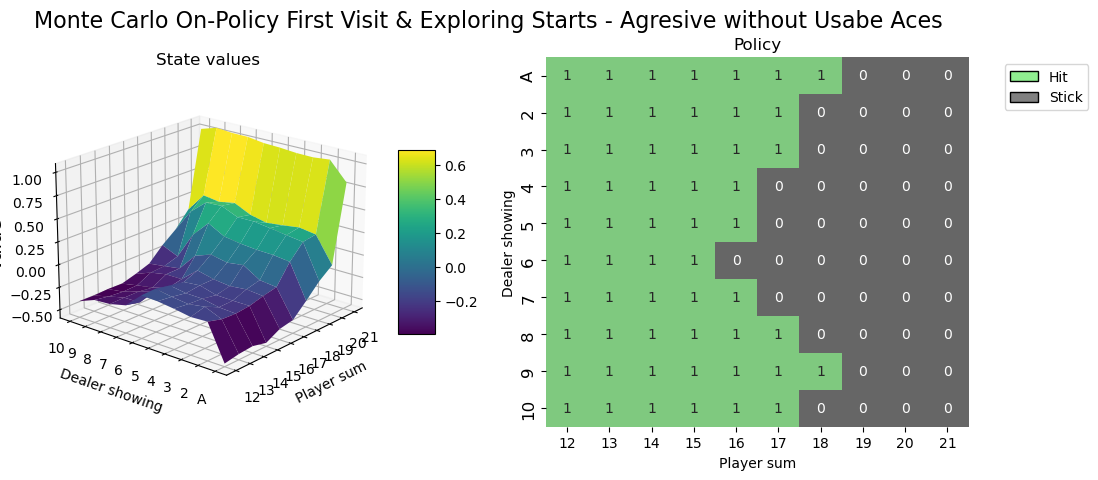

In [8]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy First Visit & Exploring Starts - Agressive without Usabe Aces")

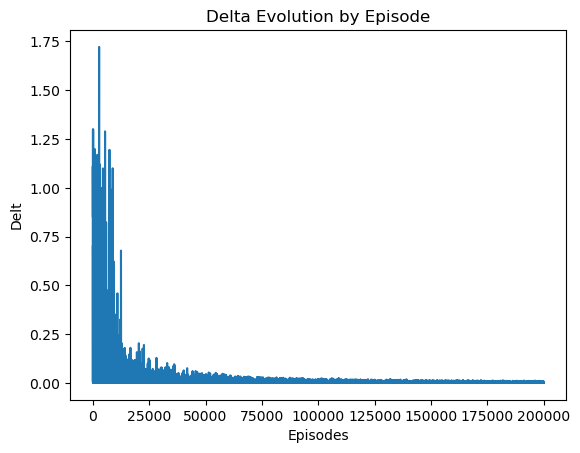

In [9]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [10]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

_________________________________________
Episode 0
State: (9, 9, False)
The Agent's current sum: 9, The Dealer's one showing card: 9, Agent's usable ace: False
The Agent has the following cards: [3, 6]
The Dealer has the following cards: [9, 6]
Hit
State: (19, 9, False)
The Agent's current sum: 19, The Dealer's one showing card: 9, Agent's usable ace: False
The Agent has the following cards: [3, 6, 10]
The Dealer has the following cards: [9, 6]
Stand
State: (19, 9, False)
The Agent's current sum: 19, The Dealer's one showing card: 9, Agent's usable ace: False
The Agent has the following cards: [3, 6, 10]
The Dealer has the following cards: [9, 6, 5]
Done: True
state: (19, 9, False)
player has [3, 6, 10]
the players current sum:19,dealer's one showing card:9, usable ace:False
dealer cards: [9, 6, 5] and score: 20 your score i: 19 
agent  loses
_________________________________________
Episode 1
State: (9, 10, False)
The Agent's current sum: 9, The Dealer's one showing card: 10, Agent's

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, V, Q, DELTA = monte_carlo_on_policy(environment = environment, 
                                         N_episodes = n_episode, 
                                         discount_factor = 1, 
                                         first_visit = True, 
                                         theta = 0,
                                         agent_type = "Agressivo") 
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), " average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

#### 4.2.1.2 Monte Carlo On-Policy First Visit & Exploring Starts - Conservative


In [12]:
policy, V, Q, DELTA = monte_carlo_on_policy(environment, N_episodes = 200000, discount_factor = 0.9, epsilon = 0.05, first_visit = True, theta=0, agent_type = "Conservativo")  

In [13]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment, policy, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo On-Policy First Visit & Exploring Starts - Conservative", average_wins, average_losses, average_draws]

╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.282475 │
├────────────────┼──────────┤
│ Average Losses │ 0.67634  │
├────────────────┼──────────┤
│ Average Draws  │ 0.041185 │
╘════════════════╧══════════╛


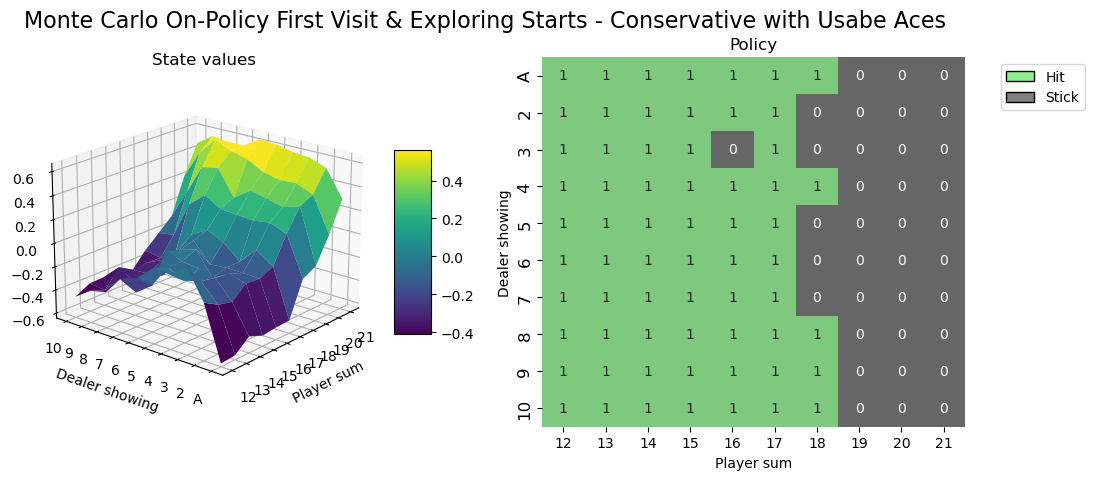

In [14]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy First Visit & Exploring Starts - Conservative with Usabe Aces")
plt.show()

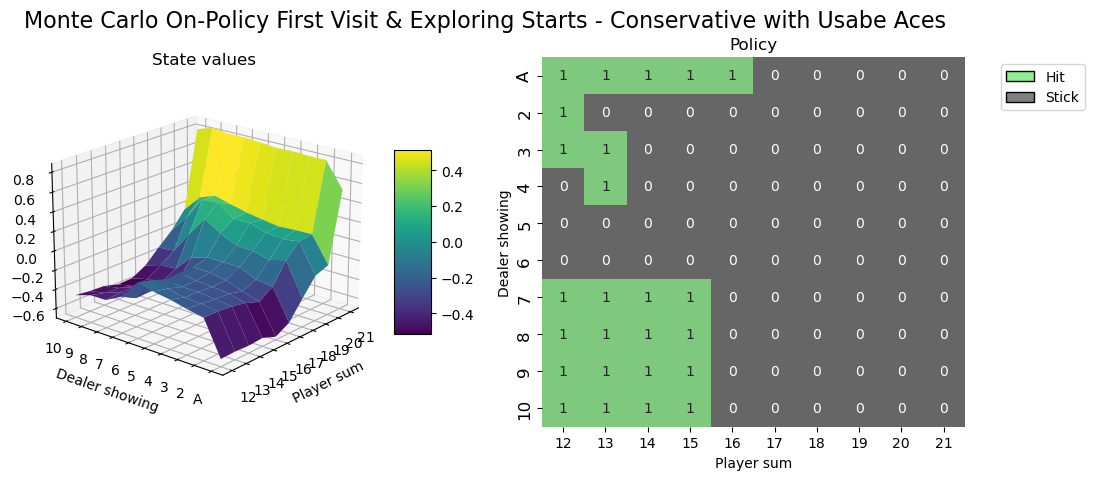

In [15]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy First Visit & Exploring Starts - Conservative without Usabe Aces")
plt.show()

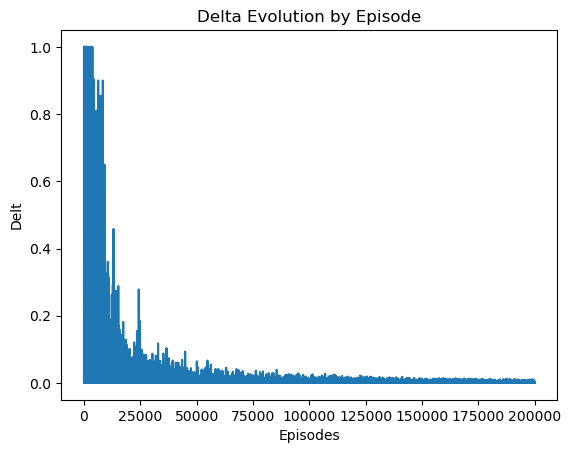

In [16]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [17]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

_________________________________________
Episode 0
State: (21, 9, True)
The Agent's current sum: 21, The Dealer's one showing card: 9, Agent's usable ace: True
The Agent has the following cards: [10, 1]
The Dealer has the following cards: [9, 1]
Stand
State: (21, 9, True)
The Agent's current sum: 21, The Dealer's one showing card: 9, Agent's usable ace: True
The Agent has the following cards: [10, 1]
The Dealer has the following cards: [9, 1]
Done: True
state: (21, 9, True)
player has [10, 1]
the players current sum:21,dealer's one showing card:9, usable ace:True
dealer cards: [9, 1] and score: 20 your score i: 21 
agent  wins
_________________________________________
Episode 1
State: (12, 8, False)
The Agent's current sum: 12, The Dealer's one showing card: 8, Agent's usable ace: False
The Agent has the following cards: [10, 2]
The Dealer has the following cards: [8, 7]
Hit
State: (19, 8, False)
The Agent's current sum: 19, The Dealer's one showing card: 8, Agent's usable ace: False


In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, V, Q, DELTA = monte_carlo_on_policy(environment = environment, 
                                         N_episodes = n_episode, 
                                         discount_factor = 1, 
                                         first_visit = True, 
                                         theta = 0,
                                         agent_type = "Conservativo")  
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), " Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

#### 4.2.1.3 Monte Carlo On-Policy First Visit & Exploring Starts - Neutral


In [18]:
policy, V, Q, DELTA = monte_carlo_on_policy(environment, N_episodes = 200000, discount_factor = 0.9, epsilon = 0.05, first_visit = True, theta=0, agent_type = "Neutro")  

In [19]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment, policy, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo On-Policy First Visit & Exploring Starts - Neutral", average_wins, average_losses, average_draws]

╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.283665 │
├────────────────┼──────────┤
│ Average Losses │ 0.67543  │
├────────────────┼──────────┤
│ Average Draws  │ 0.040905 │
╘════════════════╧══════════╛


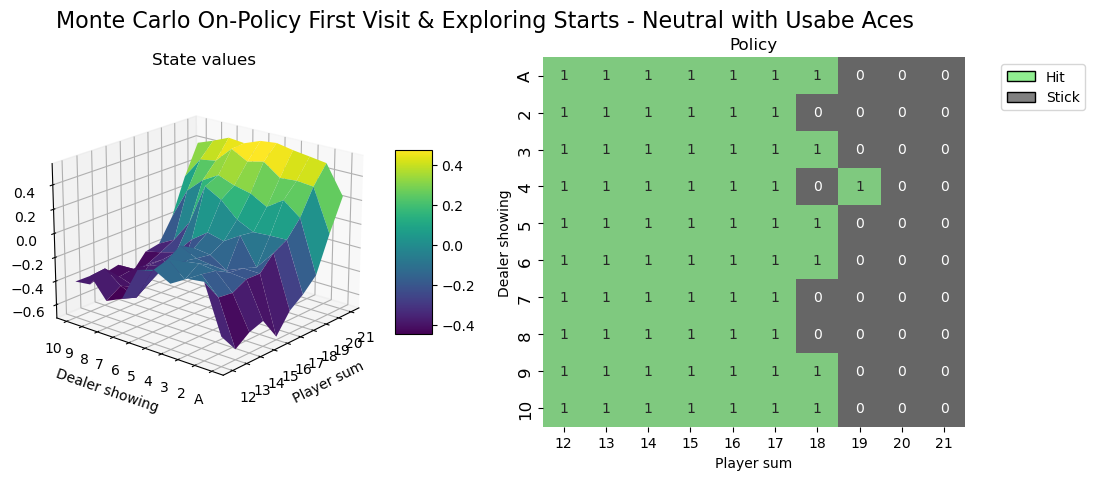

In [20]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy First Visit & Exploring Starts - Neutral with Usabe Aces")
plt.show()

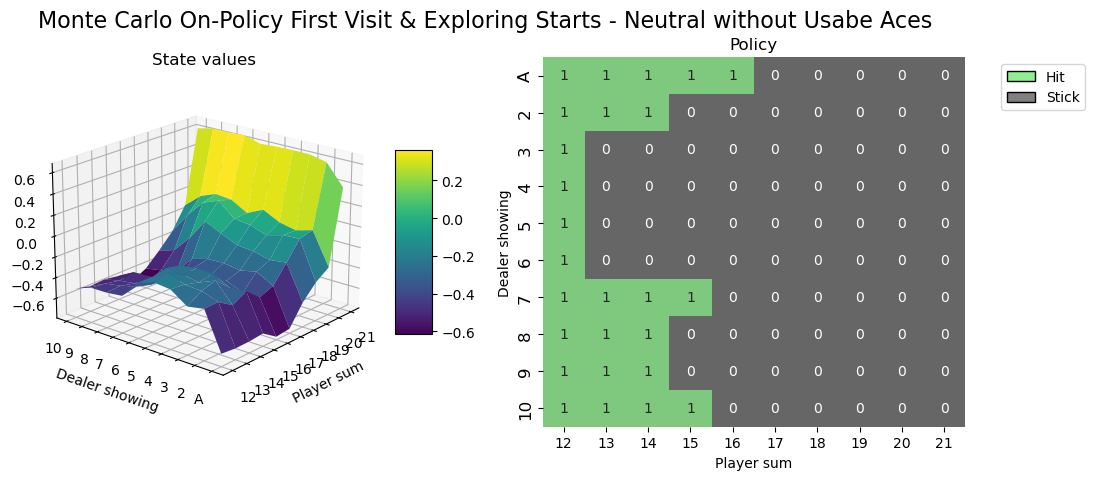

In [21]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy First Visit & Exploring Starts - Neutral without Usabe Aces")
plt.show()

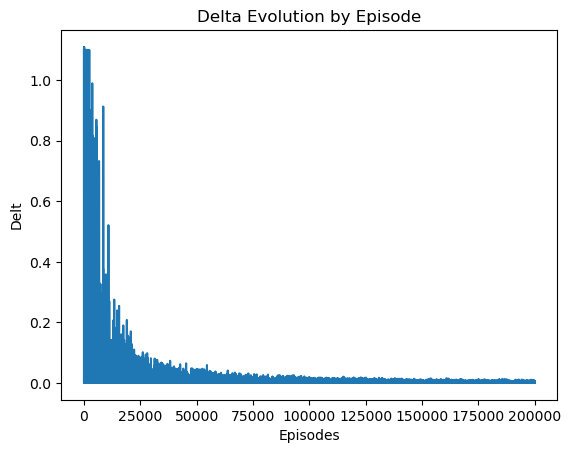

In [22]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [23]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

_________________________________________
Episode 0
State: (9, 8, False)
The Agent's current sum: 9, The Dealer's one showing card: 8, Agent's usable ace: False
The Agent has the following cards: [7, 2]
The Dealer has the following cards: [8, 4]
Hit
State: (19, 8, False)
The Agent's current sum: 19, The Dealer's one showing card: 8, Agent's usable ace: False
The Agent has the following cards: [7, 2, 10]
The Dealer has the following cards: [8, 4]
Stand
State: (19, 8, False)
The Agent's current sum: 19, The Dealer's one showing card: 8, Agent's usable ace: False
The Agent has the following cards: [7, 2, 10]
The Dealer has the following cards: [8, 4, 5]
Done: True
state: (19, 8, False)
player has [7, 2, 10]
the players current sum:19,dealer's one showing card:8, usable ace:False
dealer cards: [8, 4, 5] and score: 17 your score i: 19 
agent  wins
_________________________________________
Episode 1
State: (18, 10, False)
The Agent's current sum: 18, The Dealer's one showing card: 10, Agent'

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, V, Q, DELTA = monte_carlo_on_policy(environment = environment, 
                                         N_episodes = n_episode, 
                                         discount_factor = 1, 
                                         first_visit = True, 
                                         theta = 0,
                                         agent_type = "Neutro")   
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), " Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

### 4.2.2 Monte Carlo On-Policy Every Visit & Exploring Starts

In [11]:
# Define the hyperparameter values to test
n_episode_values = [200000]
discount_factor_values = [0.7]#, 0.9, 0.95, 0.99, 1.0]
first_visit_values = [False]
epsilon_values = [0.05]#, 0.1, 0.2, 0.5, 0.9]
theta_values = [0]#, 0.001, 0.05, 0.1, 0.5, 1.0]

# Lists to store the results
tuning_results = []

# Perform grid search
for n_episode, discount_factor, first_visit, epsilon, theta in itertools.product(n_episode_values, discount_factor_values, first_visit_values, epsilon_values, theta_values):
    print(f"n_episode: {n_episode}, discount_factor: {discount_factor}, first_visit: {first_visit}, epsilon: {epsilon}, theta: {theta}")
    
    start_time = time.time()  # Record the start time

    policy, V, Q, DELTA = monte_carlo_on_policy(environment=environment, 
                                         N_episodes=n_episode, 
                                         discount_factor=discount_factor, 
                                         first_visit=first_visit, 
                                         epsilon=epsilon,
                                         theta=theta)
    
    elapsed_time = time.time() - start_time  # Calculate elapsed time


    average_wins, average_losses, average_draws = average_results_with_plot(environment=environment, policy=policy, episodes=5000000)
    
    print(f"Average: {average_wins}\n")
    print(f"Elapsed Time: {elapsed_time} seconds\n")  # Print the elapsed time
    
    tuning_results.append({
        "n_episode": n_episode,
        "discount_factor": discount_factor,
        "first_visit": first_visit,
        "epsilon": epsilon,
        "theta": theta,
        "average": average_wins,
        "elapsed_time": elapsed_time
    })

# Find the best combination of hyperparameters
best_result = max(tuning_results, key=lambda x: x["average"])
print("Best Hyperparameters:")
print("n_episode:", best_result["n_episode"])
print("discount_factor:", best_result["discount_factor"])
print("first_visit:", best_result["first_visit"])
print("epsilon:", best_result["epsilon"])
print("theta:", best_result["theta"])
print("Average:", best_result["average"])
print("Elapsed Time:", best_result["elapsed_time"], "seconds")


n_episode: 200000, discount_factor: 0.7, first_visit: False, epsilon: 0.05, theta: 0
Average: 0.433172

Elapsed Time: 28.873775959014893 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: False, epsilon: 0.1, theta: 0
Average: 0.431855

Elapsed Time: 27.686946868896484 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: False, epsilon: 0.2, theta: 0
Average: 0.4330154

Elapsed Time: 38.706543922424316 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: False, epsilon: 0.5, theta: 0
Average: 0.4322762

Elapsed Time: 48.95163178443909 seconds

n_episode: 200000, discount_factor: 0.7, first_visit: False, epsilon: 0.9, theta: 0
Average: 0.4326748

Elapsed Time: 28.97954297065735 seconds

n_episode: 200000, discount_factor: 0.9, first_visit: False, epsilon: 0.05, theta: 0
Average: 0.4324342

Elapsed Time: 28.437885522842407 seconds

n_episode: 200000, discount_factor: 0.9, first_visit: False, epsilon: 0.1, theta: 0
Average: 0.431787

Elapsed Time: 28.384002

#### 4.2.2.1 Monte Carlo On-Policy Every Visit & Exploring Starts - Agressive


In [24]:
policy, V, Q, DELTA = monte_carlo_on_policy(environment, N_episodes = 500000, discount_factor = 0.7, epsilon = 0.05, first_visit = False, theta=0, agent_type = "Agressivo") 

In [25]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo On-Policy Every Visit & Exploring Starts - Agressive", average_wins, average_losses, average_draws]

╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.28238  │
├────────────────┼──────────┤
│ Average Losses │ 0.676665 │
├────────────────┼──────────┤
│ Average Draws  │ 0.040955 │
╘════════════════╧══════════╛


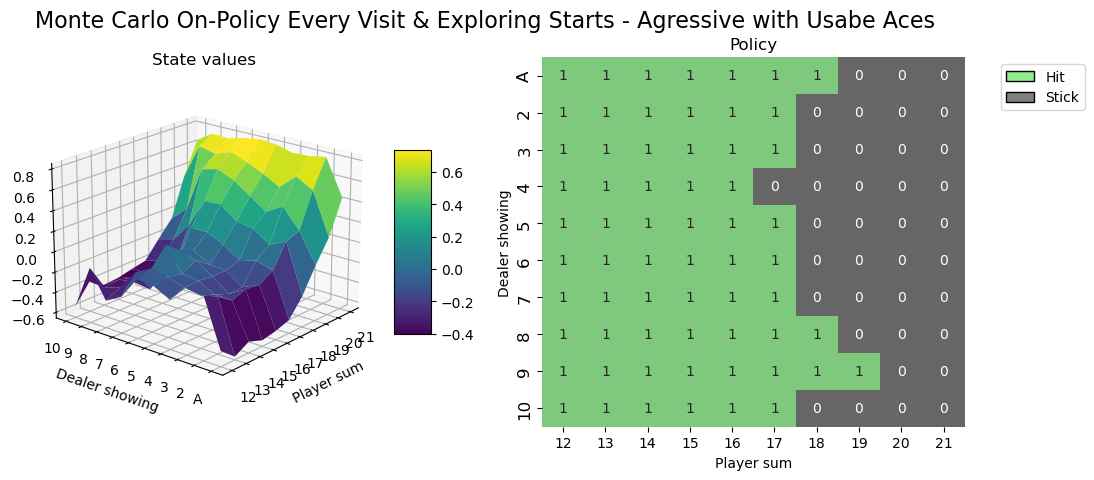

In [26]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy Every Visit & Exploring Starts - Agressive with Usabe Aces")
plt.show()

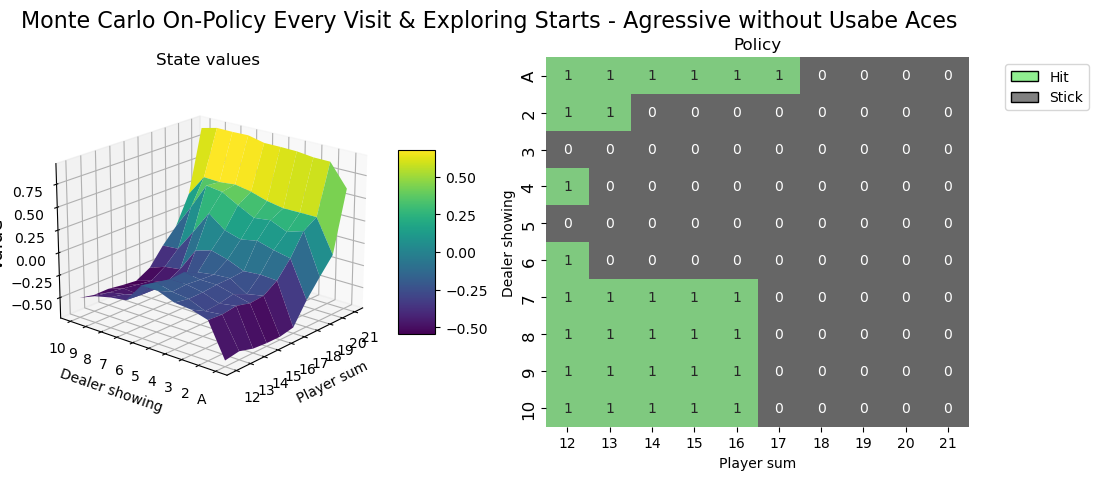

In [27]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy Every Visit & Exploring Starts - Agressive without Usabe Aces")
plt.show()

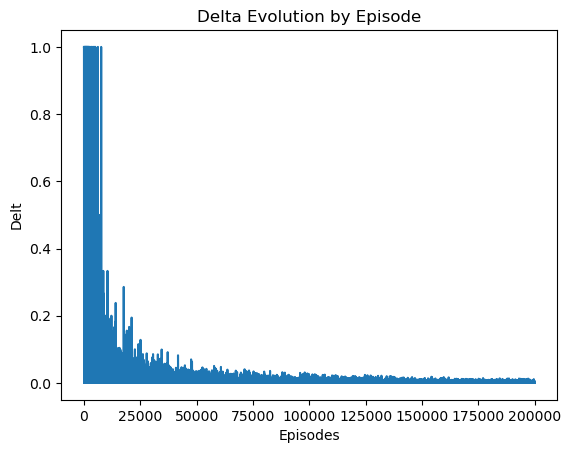

In [28]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [29]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

_________________________________________
Episode 0
State: (21, 10, True)
The Agent's current sum: 21, The Dealer's one showing card: 10, Agent's usable ace: True
The Agent has the following cards: [10, 1]
The Dealer has the following cards: [10, 7]
Stand
State: (21, 10, True)
The Agent's current sum: 21, The Dealer's one showing card: 10, Agent's usable ace: True
The Agent has the following cards: [10, 1]
The Dealer has the following cards: [10, 7]
Done: True
state: (21, 10, True)
player has [10, 1]
the players current sum:21,dealer's one showing card:10, usable ace:True
dealer cards: [10, 7] and score: 17 your score i: 21 
agent  wins
_________________________________________
Episode 1
State: (18, 10, False)
The Agent's current sum: 18, The Dealer's one showing card: 10, Agent's usable ace: False
The Agent has the following cards: [8, 10]
The Dealer has the following cards: [10, 10]
Stand
State: (18, 10, False)
The Agent's current sum: 18, The Dealer's one showing card: 10, Agent's u

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, V, Q, DELTA = monte_carlo_on_policy(environment = environment, 
                                         N_episodes = n_episode, 
                                         discount_factor = 1, 
                                         first_visit = True, 
                                         theta = 0,
                                         agent_type = "Agressivo")  
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), "Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

#### 4.2.2.2 Monte Carlo On-Policy Every Visit & Exploring Starts - Conservative


In [30]:
policy, V, Q, DELTA = monte_carlo_on_policy(environment, N_episodes = 200000, discount_factor = 0.7, epsilon = 0.05, first_visit = False, theta=0, agent_type = "Conservativo") 

In [31]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo On-Policy Every Visit & Exploring Starts - Conservative", average_wins, average_losses, average_draws]

╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.28258  │
├────────────────┼──────────┤
│ Average Losses │ 0.675835 │
├────────────────┼──────────┤
│ Average Draws  │ 0.041585 │
╘════════════════╧══════════╛


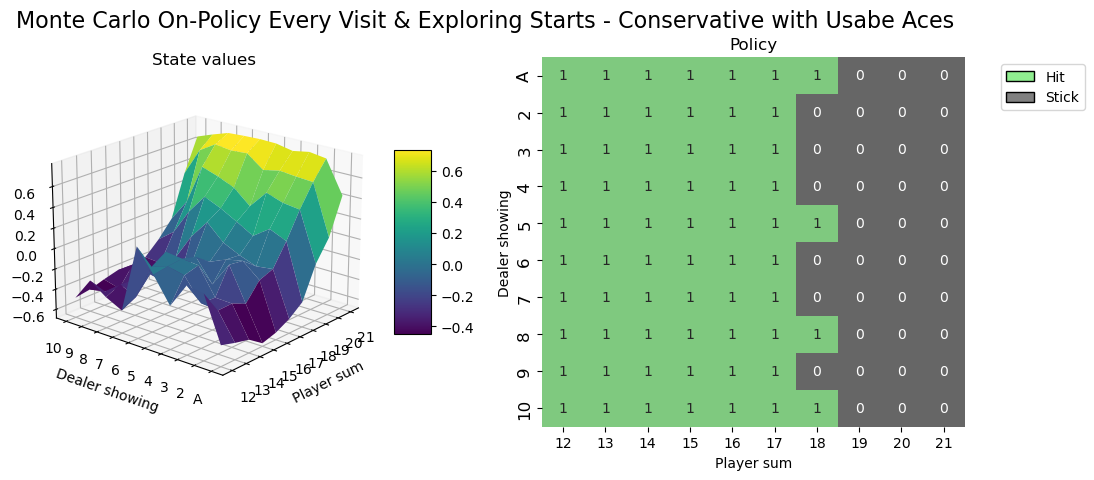

In [32]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy Every Visit & Exploring Starts - Conservative with Usabe Aces")
plt.show()

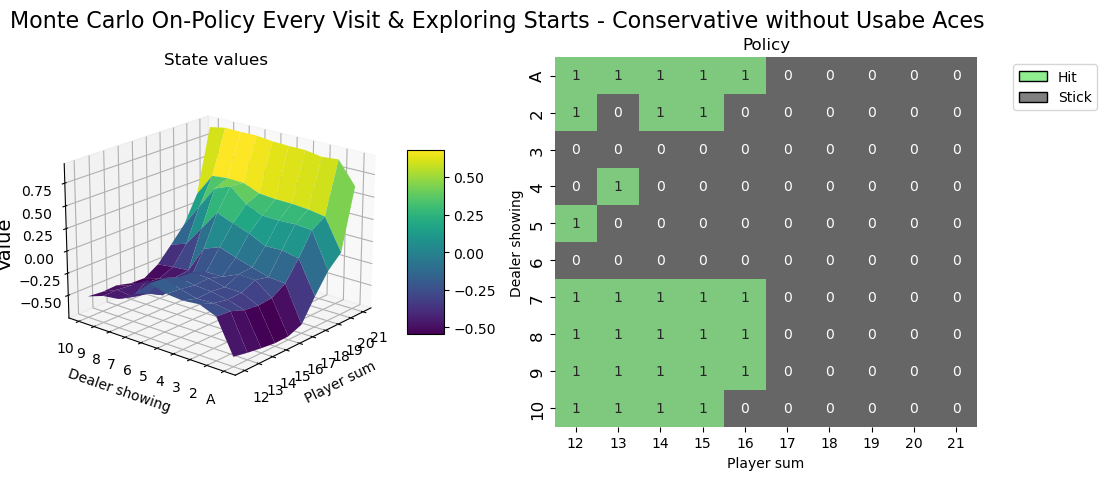

In [33]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy Every Visit & Exploring Starts - Conservative without Usabe Aces")
plt.show()

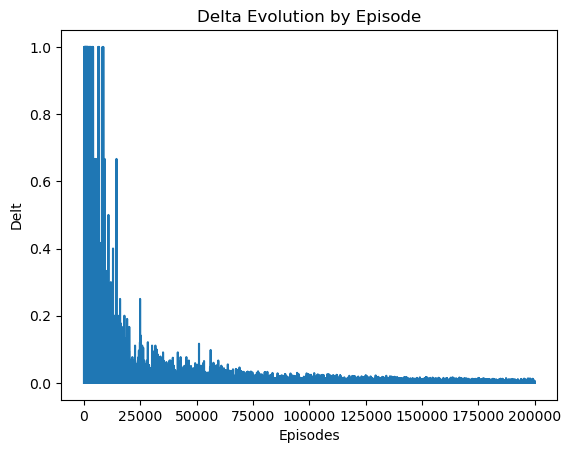

In [34]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [35]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

_________________________________________
Episode 0
State: (16, 4, False)
The Agent's current sum: 16, The Dealer's one showing card: 4, Agent's usable ace: False
The Agent has the following cards: [6, 10]
The Dealer has the following cards: [4, 7]
Stand
State: (16, 4, False)
The Agent's current sum: 16, The Dealer's one showing card: 4, Agent's usable ace: False
The Agent has the following cards: [6, 10]
The Dealer has the following cards: [4, 7, 8]
Done: True
state: (16, 4, False)
player has [6, 10]
the players current sum:16,dealer's one showing card:4, usable ace:False
dealer cards: [4, 7, 8] and score: 19 your score i: 16 
agent  loses
_________________________________________
Episode 1
State: (9, 4, False)
The Agent's current sum: 9, The Dealer's one showing card: 4, Agent's usable ace: False
The Agent has the following cards: [2, 7]
The Dealer has the following cards: [4, 5]
Hit
State: (18, 4, False)
The Agent's current sum: 18, The Dealer's one showing card: 4, Agent's usable a

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, V, Q, DELTA = monte_carlo_on_policy(environment = environment, 
                                         N_episodes = n_episode, 
                                         discount_factor = 1, 
                                         first_visit = True, 
                                         theta = 0,
                                         agent_type = "Conservativo")  
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), "Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

#### 4.2.2.3 Monte Carlo On-Policy Every Visit & Exploring Starts - Neutral

In [36]:
policy, V, Q, DELTA = monte_carlo_on_policy(environment, N_episodes = 200000, discount_factor = 0.7, epsilon = 0.05, first_visit = False, theta=0, agent_type = "Neutro") 

In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo On-Policy Every Visit & Exploring Starts - Neutral", average_wins, average_losses, average_draws]

In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy Every Visit & Exploring Starts - Neutral with Usabe Aces")
plt.show()

In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo On-Policy Every Visit & Exploring Starts - Neutral without Usabe Aces")
plt.show()

In [ ]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [ ]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, V, Q, DELTA = monte_carlo_on_policy(environment = environment, 
                                         N_episodes = n_episode, 
                                         discount_factor = 1, 
                                         first_visit = True, 
                                         theta = 0,
                                         agent_type = "Neutro")  
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), "Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

### 4.2.3 Monte Carlo Off-Policy 

In [ ]:
# Define the hyperparameter values to test - PP
n_episode_values = [200000]
discount_factor_values = [0.7]#, 0.9, 0.95, 0.99, 1.0]
epsilon_values = [0.05]#, 0.1, 0.2, 0.5, 0.9]
theta_values = [0]#, 0.001, 0.05, 0.1, 0.5, 1.0]

# Lists to store the results
tuning_results = []

# Perform grid search
for n_episode, discount_factor, epsilon, theta in itertools.product(n_episode_values, discount_factor_values, epsilon_values, theta_values):
    print(f"n_episode: {n_episode}, discount_factor: {discount_factor}, epsilon: {epsilon}, theta: {theta}")
    
    start_time = time.time()  # Record the start time

    policy, Q, DELTA = monte_carlo_off_policy(environment, 
                                              N_episodes = n_episode_values, 
                                              discount_factor = discount_factor_values, 
                                              epsilon = epsilon_values, 
                                              theta=theta_values)  
    
    elapsed_time = time.time() - start_time  # Calculate elapsed time


    average_wins, average_losses, average_draws = average_results_with_plot(environment=environment, policy=policy, episodes=5000000, plot = False)
    
    print(f"Average: {average_wins}\n")
    print(f"Elapsed Time: {elapsed_time} seconds\n")  # Print the elapsed time
    
    tuning_results.append({
        "n_episode": n_episode,
        "discount_factor": discount_factor,
        "epsilon": epsilon,
        "theta": theta,
        "average": average_wins,
        "elapsed_time": elapsed_time
    })

# Find the best combination of hyperparameters
best_result = max(tuning_results, key=lambda x: x["average"])
print("Best Hyperparameters:")
print("n_episode:", best_result["n_episode"])
print("discount_factor:", best_result["discount_factor"])
print("epsilon:", best_result["epsilon"])
print("theta:", best_result["theta"])
print("Average:", best_result["average"])
print("Elapsed Time:", best_result["elapsed_time"], "seconds")

#### 4.2.3.1 Monte Carlo Off-Policy - Agressive

In [23]:
policy, Q, DELTA = monte_carlo_off_policy(environment, N_episodes = 200000, discount_factor = 0.7, epsilon = 0.05, theta=0, agent_type = "Agressivo")  

In [24]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment, policy, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo Off-Policy - Agressive", average_wins, average_losses, average_draws]

Average number of wins 0.43263


In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo Off-Policy - Agressive with Usabe Aces")
plt.show()

In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo Off-Policy - Agressive without Usabe Aces")
plt.show()

In [ ]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [ ]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, Q, DELTA = monte_carlo_off_policy(environment, 
                                              N_episodes = 200000,
                                              discount_factor = 1,
                                              epsilon = 0.1, 
                                              theta=0, 
                                              agent_type = "Agressivo")  
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), "Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

#### 4.2.3.2 Monte Carlo Off-Policy - Conservative

In [ ]:
policy, Q, DELTA = monte_carlo_off_policy(environment, N_episodes = 200000, discount_factor = 0.7, epsilon = 0.05, theta=0, agent_type = "Conservativo")  

In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment,  policy, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo Off-Policy - Conservative", average_wins, average_losses, average_draws]

In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo Off-Policy - Conservative with Usabe Aces")
plt.show()

In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo Off-Policy - Conservative without Usabe Aces")
plt.show()

In [ ]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [ ]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, Q, DELTA = monte_carlo_off_policy(environment, 
                                              N_episodes = 200000,
                                              discount_factor = 1,
                                              epsilon = 0.1, 
                                              theta=0, 
                                              agent_type = "Conservativo")  
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), "Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

#### 4.2.3.3 Monte Carlo Off-Policy - Neutral

In [ ]:
policy, Q, DELTA = monte_carlo_off_policy(environment, N_episodes = 200000, discount_factor = 0.7, epsilon = 0.05, theta=0, agent_type = "Neutro")  

In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = average_results_with_plot(environment,  policy, episodes=200000, plot=True)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Monte Carlo Off-Policy - Neutral", average_wins, average_losses, average_draws]

In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=True)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo Off-Policy - Neutral with Usabe Aces")
plt.show()

In [ ]:
value_grid, policy_grid = create_grids_monte_carlo(policy, V, usable_ace=False)

fig1 = create_plots(value_grid, policy_grid, title="Monte Carlo Off-Policy - Neutral without Usabe Aces")
plt.show()

In [ ]:
plt.plot(DELTA)
plt.xlabel("Episodes")
plt.ylabel("Delt")
plt.title("Delta Evolution by Episode")
plt.show()

In [ ]:
games_with_policy(environment = environment, 
                  policy = policy, 
                  episodes = 100)

In [ ]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 2000000]:
   
    print("Nº of Episode: ", str(n_episode))
    policy, Q, DELTA = monte_carlo_off_policy(environment, 
                                              N_episodes = 200000,
                                              discount_factor = 1,
                                              epsilon = 0.1, 
                                              theta=0, 
                                              agent_type = "Neutro")  
    
    average_wins, average_losses, average_draws = average_results_with_plot(environment = environment, 
                                    policy = policy, 
                                    episodes = 5000000,
                                    plot=False)
    
    print("Nº of Episode: ", str(n_episode), "Average: ", str(average_wins))
    accuracy.append(average_wins)
    episodes.append(n_episode)

In [ ]:
plt.plot(episodes, accuracy)
plt.title("Evolution of the Win Rate per Episode")
plt.ylabel('Win Rate (%)')
plt.xlabel('Number of Episodes')
plt.show()

## 4.3 Q-Learning

In [7]:
# Define the hyperparameter values to test
learning_rate_values = [0.01]#·, 0.001, 0.0001, 0.00001]
n_episodes_values = [200000]
start_epsilon_values = [0.40]#0.8, 0.6, 0.4, 0.2]
epsilon_decay_values = [start_epsilon / (n_episodes / 2) for start_epsilon, n_episodes in itertools.product(start_epsilon_values, n_episodes_values)]
final_epsilon_values = [0.4]#, 0.5, 0.1, 0.05]
discount_factor_values = [0.9]#1, 0.9, 0.7] 

# Lists to store the results
tuning_results = []

# Perform grid search
for learning_rate, n_episodes, start_epsilon, epsilon_decay, final_epsilon, discount_factor in itertools.product(learning_rate_values, n_episodes_values, start_epsilon_values, epsilon_decay_values, final_epsilon_values, discount_factor_values):
    print(f"learning_rate: {learning_rate}, n_episodes: {n_episodes}, start_epsilon: {start_epsilon}, epsilon_decay: {epsilon_decay}, final_epsilon: {final_epsilon}, discount_factor: {discount_factor}")
    
    start_time = time.time()  # Record the start time

    # Initialize Q-Learning agent with discount factor
    Q_agent = QLearningAgent(environment=environment, 
                           learning_rate=learning_rate, 
                           initial_epsilon=start_epsilon, 
                           epsilon_decay=epsilon_decay, 
                           final_epsilon=final_epsilon,
                           discount_factor=discount_factor)

    elapsed_time = time.time() - start_time  # Calculate elapsed time

    # Evaluate the agent's performance after training
    average_wins, average_losses, average_draws = play_n_games(Q_agent, environment, 200000)  # Adjust the play_n_games function as per your requirements

    print(f"Average Wins: {average_wins}\n")
    print(f"Elapsed Time: {elapsed_time} seconds\n")  # Print the elapsed time
    
    tuning_results.append({
        "learning_rate": learning_rate,
        "n_episodes": n_episodes,
        "start_epsilon": start_epsilon,
        "epsilon_decay": epsilon_decay,
        "final_epsilon": final_epsilon,
        "discount_factor": discount_factor,
        "average_wins": average_wins,
        "elapsed_time": elapsed_time
    })

# Find the best combination of hyperparameters
best_result = max(tuning_results, key=lambda x: x["average_wins"])
print("Best Hyperparameters:")
print(f"Learning Rate: {best_result['learning_rate']}")
print(f"Number of Episodes: {best_result['n_episodes']}")
print(f"Start Epsilon: {best_result['start_epsilon']}")
print(f"Epsilon Decay: {best_result['epsilon_decay']}")
print(f"Final Epsilon: {best_result['final_epsilon']}")
print(f"Discount Factor: {best_result['discount_factor']}")
print(f"Average Wins: {best_result['average_wins']}")
print(f"Elapsed Time: {best_result['elapsed_time']} seconds")

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.5, discount_factor: 1
Average Wins: 0.384605

Elapsed Time: 0.007411003112792969 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.5, discount_factor: 0.9
Average Wins: 0.38265

Elapsed Time: 0.006952524185180664 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.5, discount_factor: 0.7
Average Wins: 0.385625

Elapsed Time: 0.00767970085144043 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.4, discount_factor: 1
Average Wins: 0.383395

Elapsed Time: 0.009670019149780273 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.4, discount_factor: 0.9
Average Wins: 0.385625

Elapsed Time: 0.0078125 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0

### 4.3.1 Q-Learning Aggressive

In [5]:
# hyperparameters
learning_rate = 0.01
n_episodes = 2000000
start_epsilon = 0.4
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.4
discount_factor = 0.9

QLearningAgent_Aggressive = QLearningAgent(environment = environment, 
                                           agent_type = "Agressivo",
                                           learning_rate = learning_rate, 
                                           initial_epsilon = start_epsilon, 
                                           epsilon_decay = epsilon_decay, 
                                           final_epsilon = final_epsilon,
                                           discount_factor = discount_factor)

In [6]:
env = gym.wrappers.RecordEpisodeStatistics(environment, deque_size = n_episodes)

QLearningAgent_Aggressive.train(env = env, n_episodes = n_episodes)

100%|██████████| 2000000/2000000 [05:21<00:00, 6228.69it/s]


In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = play_n_games(QLearningAgent_Aggressive, environment, 200000)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["QLearning - Agressive", average_wins, average_losses, average_draws]

╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.416875 │
├────────────────┼──────────┤
│ Average Losses │ 0.4962   │
├────────────────┼──────────┤
│ Average Draws  │ 0.086925 │
╘════════════════╧══════════╛


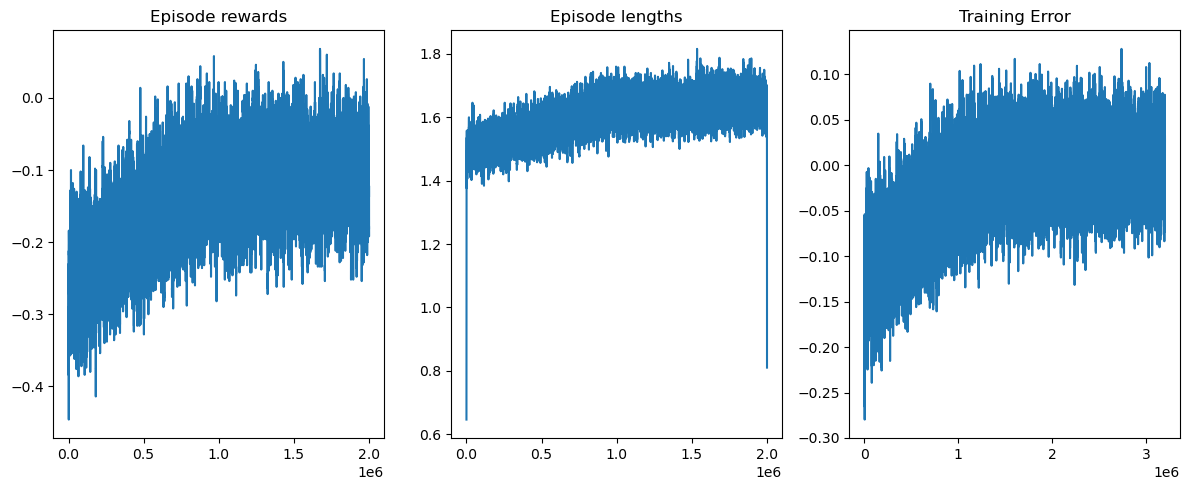

In [ ]:
training_results(QLearningAgent_Aggressive, env)

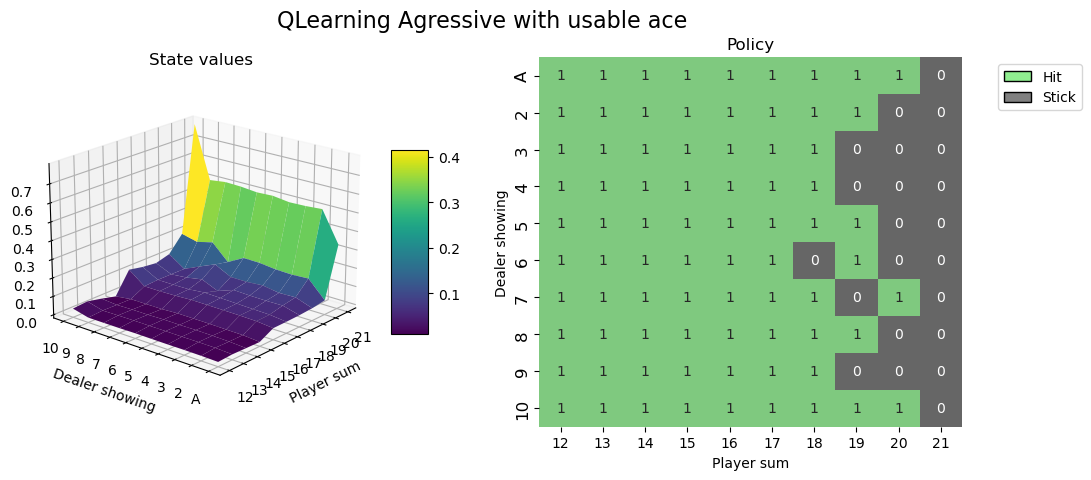

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(QLearningAgent_Aggressive, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="QLearning Agressive with usable ace")
plt.show()

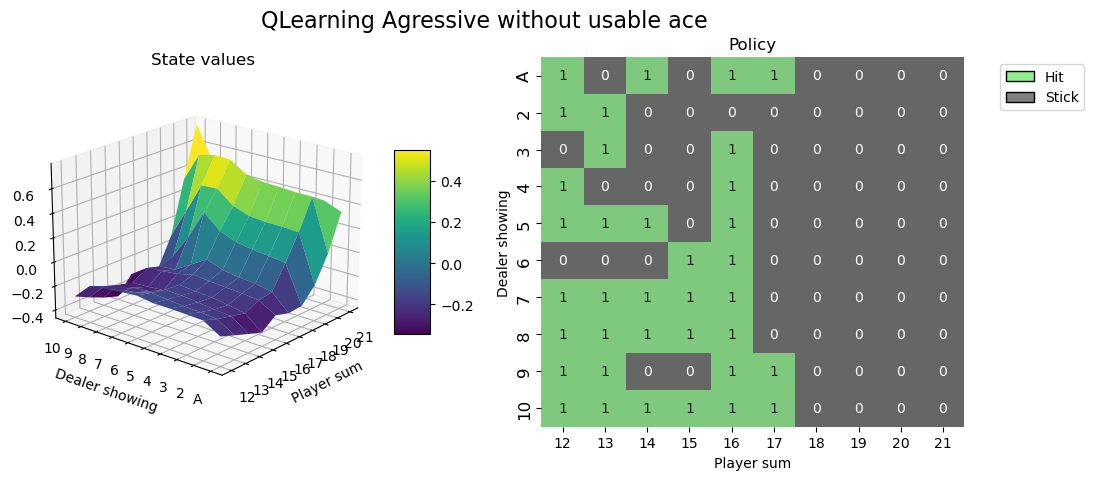

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(QLearningAgent_Aggressive, usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="QLearning Agressive without usable ace")
plt.show()

### 4.3.2 Q-Learning Conservative

In [ ]:
# hyperparameters
learning_rate = 0.01
n_episodes = 2000000
start_epsilon = 0.4
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.4
discount_factor = 0.9

QLearningAgent_Conservative = QLearningAgent(environment = environment, 
                                             agent_type = "Conservador",
                                             learning_rate = learning_rate, 
                                             initial_epsilon = start_epsilon, 
                                             epsilon_decay = epsilon_decay, 
                                             final_epsilon = final_epsilon, 
                                             discount_factor = discount_factor)

In [ ]:
env = gym.wrappers.RecordEpisodeStatistics(environment, deque_size = n_episodes)

QLearningAgent_Conservative.train_qlearning(env = env, n_episodes = n_episodes)

  0%|          | 0/200000 [00:00<?, ?it/s]

100%|██████████| 200000/200000 [00:27<00:00, 7243.41it/s]


In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = play_n_games(QLearningAgent_Conservative, environment, 200000)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["QLearning - Conservative", average_wins, average_losses, average_draws]

╒════════════════╤═════════╕
│ Metric         │   Value │
╞════════════════╪═════════╡
│ Average Wins   │ 0.4328  │
├────────────────┼─────────┤
│ Average Losses │ 0.48401 │
├────────────────┼─────────┤
│ Average Draws  │ 0.08319 │
╘════════════════╧═════════╛


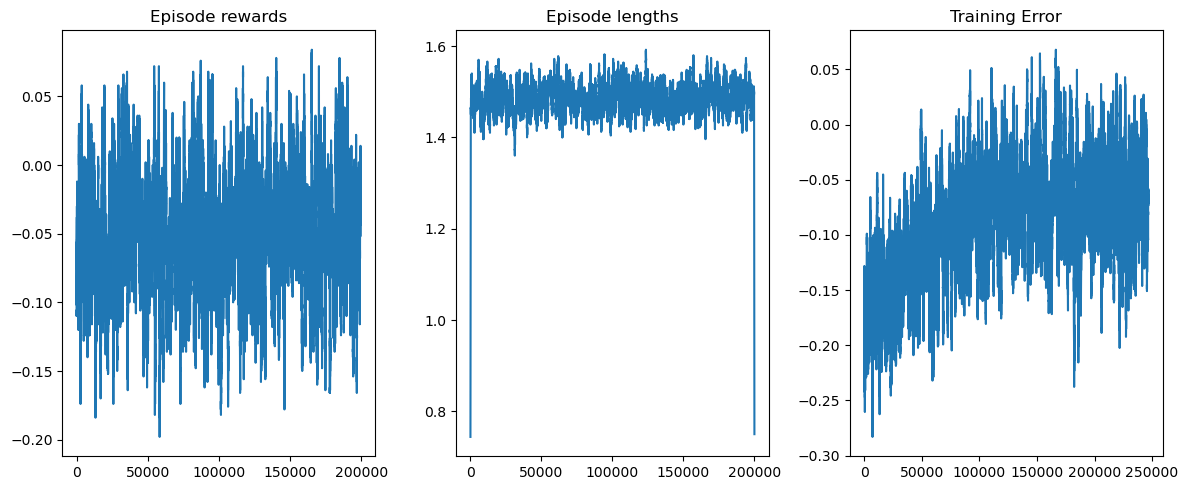

In [ ]:
training_results(QLearningAgent_Conservative, env)

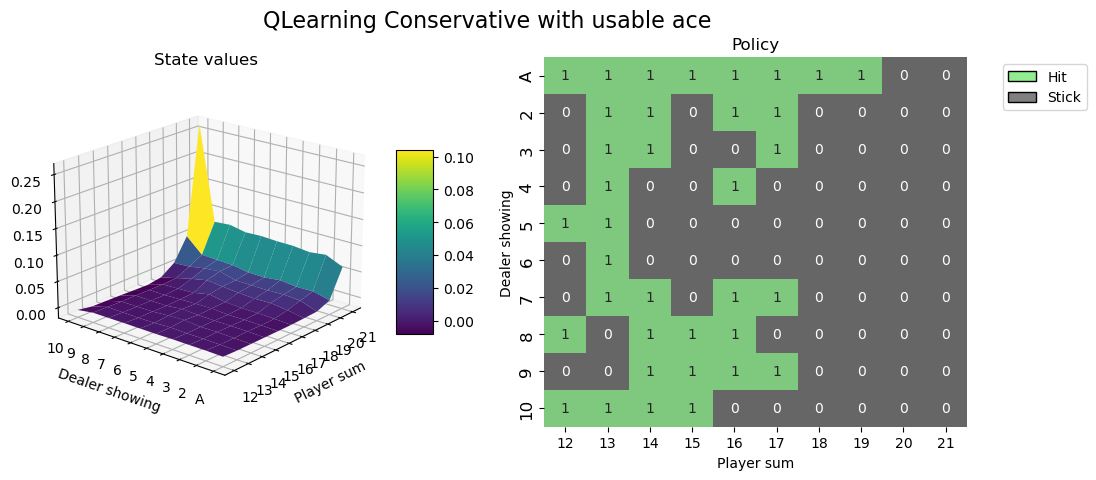

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(QLearningAgent_Conservative, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="QLearning Conservative with usable ace")
plt.show()

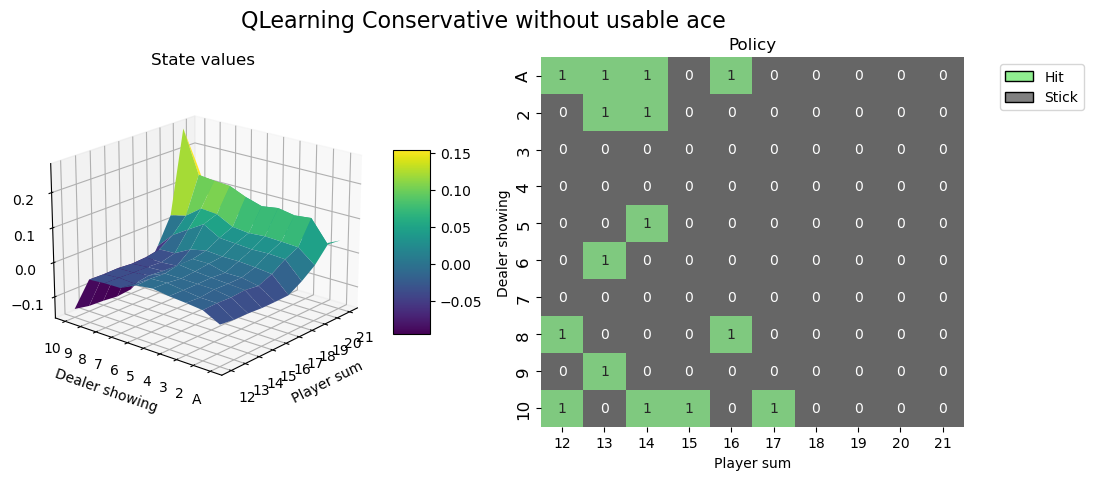

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(QLearningAgent_Conservative, usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="QLearning Conservative without usable ace")
plt.show()

### 4.3.3 Q-Learning Neutral

In [ ]:
# hyperparameters
learning_rate = 0.01
n_episodes = 2000000
start_epsilon = 0.4
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.4
discount_factor = 0.9

QLearningAgent_Neutral = QLearningAgent(environment = environment, 
                                             agent_type = "Neutro",
                                             learning_rate = learning_rate, 
                                             initial_epsilon = start_epsilon, 
                                             epsilon_decay = epsilon_decay, 
                                             final_epsilon = final_epsilon,
                                             discount_factor = discount_factor)

In [ ]:
env = gym.wrappers.RecordEpisodeStatistics(environment, deque_size = n_episodes)

QLearningAgent_Neutral.train_qlearning(env = env, n_episodes = n_episodes)

100%|██████████| 200000/200000 [00:37<00:00, 5379.61it/s]


In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = play_n_games(QLearningAgent_Neutral, environment, 200000)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["QLearning - Neutral", average_wins, average_losses, average_draws]

╒════════════════╤══════════╕
│ Metric         │    Value │
╞════════════════╪══════════╡
│ Average Wins   │ 0.43419  │
├────────────────┼──────────┤
│ Average Losses │ 0.482055 │
├────────────────┼──────────┤
│ Average Draws  │ 0.083755 │
╘════════════════╧══════════╛


In [ ]:
training_results(QLearningAgent_Conservative, env)

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(QLearningAgent_Neutral, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="QLearning Neutral with usable ace")
plt.show()

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(QLearningAgent_Neutral, usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="QLearning Neutral without usable ace")
plt.show()

## 4.4 Sarsa (Temporal Difference control)

In [7]:
# Define the hyperparameter values to test MIGUELITO
learning_rate_values = [0.00001]#0.01, 0.001, 0.0001, 0.00001]
n_episodes_values = [200000]
start_epsilon_values = [0.4]#0.8, 0.6, 0.4, 0.2]
epsilon_decay_values = [start_epsilon / (n_episodes / 2) for start_epsilon, n_episodes in itertools.product(start_epsilon_values, n_episodes_values)]
final_epsilon_values = [0.5]#, 0.4, 0.1, 0.05]
discount_factor_values = [0.7]#1, 0.9, 0.7]  

# Lists to store the results
tuning_results = []

# Perform grid search
for learning_rate, n_episodes, start_epsilon, epsilon_decay, final_epsilon, discount_factor in itertools.product(learning_rate_values, n_episodes_values, start_epsilon_values, epsilon_decay_values, final_epsilon_values, discount_factor_values):
    print(f"learning_rate: {learning_rate}, n_episodes: {n_episodes}, start_epsilon: {start_epsilon}, epsilon_decay: {epsilon_decay}, final_epsilon: {final_epsilon}, discount_factor: {discount_factor}")
    
    start_time = time.time()  # Record the start time

    # Initialize SARSA agent with discount factor
    sarsa_agent_instance = SarsaAgent(environment=environment, 
                       learning_rate=learning_rate, 
                       initial_epsilon=start_epsilon, 
                       epsilon_decay=epsilon_decay, 
                       final_epsilon=final_epsilon,
                       discount_factor=discount_factor)

    # Training loop
    #for episode in range(n_episodes):
        # Implement your SARSA training logic here
      #  pass

    elapsed_time = time.time() - start_time  # Calculate elapsed time

    # Evaluate the agent's performance after training
    average_wins, average_losses, average_draws = play_n_games(sarsa_agent_instance, environment, 200000)  # Adjust the play_n_games function as per your requirements

    print(f"Average Wins: {average_wins}\n")
    print(f"Elapsed Time: {elapsed_time} seconds\n")  # Print the elapsed time
    
    tuning_results.append({
        "learning_rate": learning_rate,
        "n_episodes": n_episodes,
        "start_epsilon": start_epsilon,
        "epsilon_decay": epsilon_decay,
        "final_epsilon": final_epsilon,
        "discount_factor": discount_factor,
        "average_wins": average_wins,
        "elapsed_time": elapsed_time
    })

# Find the best combination of hyperparameters
best_result = max(tuning_results, key=lambda x: x["average_wins"])
print("Best Hyperparameters:")
print(f"Learning Rate: {best_result['learning_rate']}")
print(f"Number of Episodes: {best_result['n_episodes']}")
print(f"Start Epsilon: {best_result['start_epsilon']}")
print(f"Epsilon Decay: {best_result['epsilon_decay']}")
print(f"Final Epsilon: {best_result['final_epsilon']}")
print(f"Discount Factor: {best_result['discount_factor']}")
print(f"Average Wins: {best_result['average_wins']}")
print(f"Elapsed Time: {best_result['elapsed_time']} seconds")

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.5, discount_factor: 1
Average Wins: 0.38456

Elapsed Time: 0.0 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.5, discount_factor: 0.9
Average Wins: 0.38284

Elapsed Time: 0.0 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.5, discount_factor: 0.7
Average Wins: 0.383735

Elapsed Time: 0.0 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.4, discount_factor: 1
Average Wins: 0.383545

Elapsed Time: 0.0 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.4, discount_factor: 0.9
Average Wins: 0.38315

Elapsed Time: 0.0 seconds

learning_rate: 0.01, n_episodes: 200000, start_epsilon: 0.8, epsilon_decay: 8e-06, final_epsilon: 0.4, discount_factor: 0.7
Average 

### 4.4.1 Sarsa Aggressive

In [ ]:
# hyperparameters
learning_rate = 0.0001
n_episodes = 200000
start_epsilon = 0.4
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.5
discount_factor = 0.7

SarsaAgent_Aggressive = SarsaAgent(environment = environment, 
                                   agent_type = "Agressivo",
                                   learning_rate = learning_rate, 
                                   initial_epsilon = start_epsilon, 
                                   epsilon_decay = epsilon_decay, 
                                   final_epsilon = final_epsilon,
                                   discount_factor = discount_factor)

In [ ]:
env = gym.wrappers.RecordEpisodeStatistics(environment, deque_size = n_episodes)

SarsaAgent_Aggressive.train(env = env, n_episodes = n_episodes)

In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = play_n_games(SarsaAgent_Aggressive, environment, 200000)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Sarsa - Agressive", average_wins, average_losses, average_draws]

In [35]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(SarsaAgent_Aggressive, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="Sarsa Agressive with usable ace")
plt.show()

NameError: name 'SarsaAgent_Aggressive' is not defined

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(SarsaAgent_Aggressive, usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="Sarsa Agressive without usable ace")
plt.show()

In [ ]:
wins, draws, losses = play_n_games(SarsaAgent_Aggressive, environment, 5000000)
print("wins: {}, draws: {}, losses: {}".format(wins, draws, losses))

### 4.4.2 Sarsa Conservative

In [ ]:
# hyperparameters
learning_rate = 0.0001
n_episodes = 200000
start_epsilon = 0.4
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.5
discount_factor = 0.7

SarsaAgent_Conservative = SarsaAgent(environment = environment, 
                                   agent_type = "Conservador",
                                   learning_rate = learning_rate, 
                                   initial_epsilon = start_epsilon, 
                                   epsilon_decay = epsilon_decay, 
                                   final_epsilon = final_epsilon,
                                   discount_factor = discount_factor)

In [ ]:
env = gym.wrappers.RecordEpisodeStatistics(environment, deque_size = n_episodes)

SarsaAgent_Conservative.train(env = env, n_episodes = n_episodes)

In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = play_n_games(SarsaAgent_Conservative, environment, 200000)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Sarsa - Conservative", average_wins, average_losses, average_draws]

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(SarsaAgent_Conservative, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="Sarsa Conservative with usable ace")
plt.show()

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(SarsaAgent_Conservative, usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="Sarsa Conservative without usable ace")
plt.show()

In [ ]:
wins, draws, losses = play_n_games(SarsaAgent_Conservative, environment, 5000000)
print("wins: {}, draws: {}, losses: {}".format(wins, draws, losses))

### 4.4.3 Sarsa Neutral

In [ ]:
# hyperparameters
learning_rate = 0.0001
n_episodes = 200000
start_epsilon = 0.4
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.5
discount_factor = 0.7

SarsaAgent_Neutral = SarsaAgent(environment = environment, 
                                   agent_type = "Neutral",
                                   learning_rate = learning_rate, 
                                   initial_epsilon = start_epsilon, 
                                   epsilon_decay = epsilon_decay, 
                                   final_epsilon = final_epsilon,
                                   discount_factor = discount_factor)

In [ ]:
env = gym.wrappers.RecordEpisodeStatistics(environment, deque_size = n_episodes)

SarsaAgent_Neutral.train(env = env, n_episodes = n_episodes)

In [ ]:
# Calculate the average number of wins and standard deviation
average_wins, average_losses, average_draws = play_n_games(SarsaAgent_Neutral, environment, 200000)

# Organize the data for tabulation
data = [
    ["Average Wins", average_wins], 
    ["Average Losses", average_losses], 
    ["Average Draws", average_draws]
]

# Print the results in a tabular format with "fancy grid" style
print(tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

#Add the results to the final comparison dataset
results_df.loc[len(results_df)] = ["Sarsa - Neutral", average_wins, average_losses, average_draws]

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(SarsaAgent_Neutral, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="Sarsa Neutral with usable ace")
plt.show()

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(SarsaAgent_Neutral, usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="Sarsa Neutral without usable ace")
plt.show()

In [ ]:
wins, draws, losses = play_n_games(SarsaAgent_Neutral, environment, 5000000)
print("wins: {}, draws: {}, losses: {}".format(wins, draws, losses))

## 4.5 Deep Q-Learning (PyTorch)

In [6]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

In [7]:
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

# Get number of actions from gym action space
n_actions = environment.action_space.n
# Get the number of state observations
state = environment.reset()
n_observations = len(state)
# Set the device
device = set_device()

policy_net = DeepQLearningAgent(n_observations, n_actions).to(device)
target_net = DeepQLearningAgent(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = torch.optim.Adam(policy_net.parameters(), lr = LR, amsgrad = True)
memory = ReplayMemory(10000)

steps_done = 0

Device: cpu


In [8]:
train_deepqlearning(environment, policy_network = policy_net, target_network = target_net, memory = memory, optimizer = optimizer, device = device, num_episodes = 10000000, TAU = TAU)

TypeError: select_action() missing 2 required positional arguments: 'policy_network' and 'device'

# 5. **Results Comparison and Conclusions**

In [ ]:
# Converter e formatar as colunas para porcentagem
for col in ['Average Wins', 'Average Losses', 'Average Draws']:
    # Converter para numérico
    results_df[col] = pd.to_numeric(results_df[col])
    # Multiplicar por 100, arredondar e converter para string com o símbolo %
    results_df[col] = (results_df[col] * 100).round(2).astype(str) + '%'

# Imprimir o DataFrame como um tabulate
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))